# Práctica 4: Regresión Polinomial
***
Rodriguez Nuñez Diego Eduardo

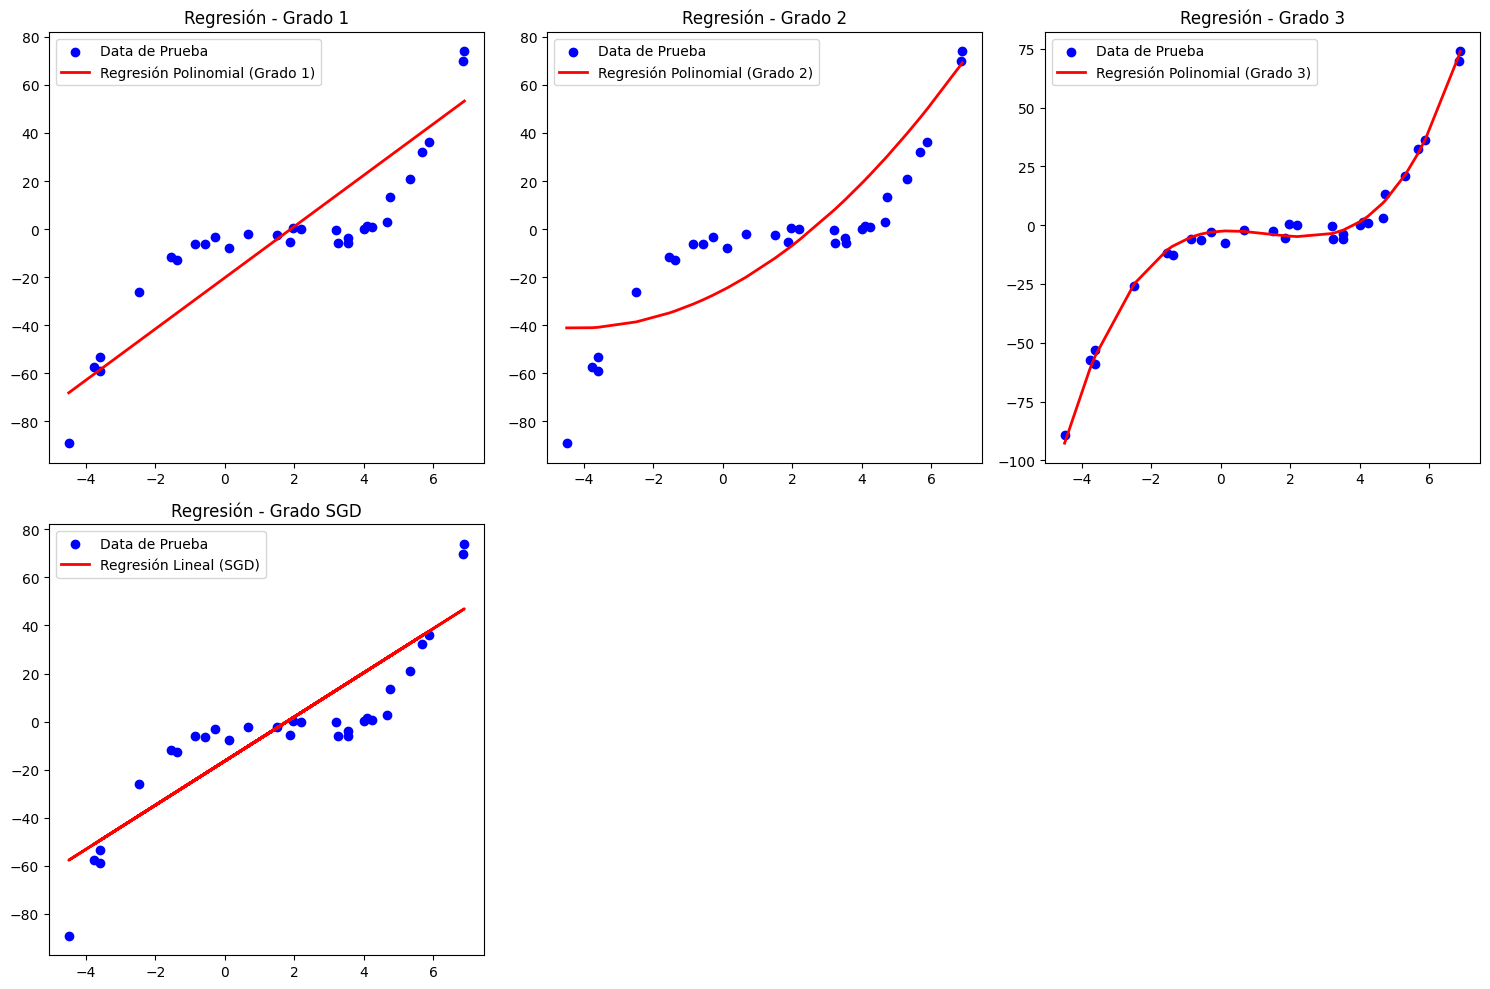

Resultados para la regresión Polinomial (Grado 1):
  MSE: 296.0945867766401
  R^2: 0.7198048208163851
Resultados para la regresión Polinomial (Grado 2):
  MSE: 352.43738401011177
  R^2: 0.6664874659184123
Resultados para la regresión Polinomial (Grado 3):
  MSE: 8.487854131822635
  R^2: 0.9919679186464004
Resultados para la regresión Lineal (SGD):
  MSE: 259.43658552202703
  R^2: 0.754494395326566


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import operator

# Paso 1: Cargar el dataset
data = pd.read_csv('datos.csv')

# Paso 2: Dividir datos en entrenamiento y prueba
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# Paso 3: Definir funciones para regresión polinomial
def polynomial_regression(X, y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model, poly_features

# Paso 4: Entrenar y evaluar modelos
models = {}
degrees = [1, 2, 3]
for degree in degrees:
    model, poly_features = polynomial_regression(X_train, y_train, degree)
    models[degree] = {'model': model, 'poly_features': poly_features}

# Regresión lineal con SGD
sgd_model = SGDRegressor()
sgd_model.fit(X_train, y_train)
models['SGD'] = sgd_model

# Paso 5: Graficar resultados
plt.figure(figsize=(15, 10))
for i, degree in enumerate(models.keys()):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test, y_test, color='blue', label='Data de Prueba')
    if degree == 'SGD':
        y_pred = models[degree].predict(X_test)
        plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión Lineal (SGD)')
    else:
        X_test_poly = models[degree]['poly_features'].transform(X_test)
        y_pred = models[degree]['model'].predict(X_test_poly)
        sorted_zip = sorted(zip(X_test, y_pred), key=operator.itemgetter(0))
        x_sorted, y_pred_sorted = zip(*sorted_zip)
        plt.plot(x_sorted, y_pred_sorted, color='red', linewidth=2, label=f'Regresión Polinomial (Grado {degree})')
    plt.legend()
    plt.title(f'Regresión - Grado {degree}')

# Paso 6: Resumen de resultados
plt.tight_layout()
plt.show()

for degree in models.keys():
    if degree == 'SGD':
        y_pred = models[degree].predict(X_test)
    else:
        X_test_poly = models[degree]['poly_features'].transform(X_test)
        y_pred = models[degree]['model'].predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Resultados para la regresión {'Lineal (SGD)' if degree == 'SGD' else f'Polinomial (Grado {degree})'}:")
    print(f"  MSE: {mse}")
    print(f"  R^2: {r2}")


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

# Paso 1: Cargar el dataset
data = pd.read_csv('cal_housing.csv')

# Paso 2: Dividir datos en entrenamiento y prueba
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# Paso 3: Definir modelos de regresión y escalado
models = {
    "Lineal": LinearRegression(),
    "Polinomial de grado 2": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Polinomial de grado 2 con escalamiento estándar": make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression()),
    "Polinomial de grado 2 con escalamiento robusto": make_pipeline(RobustScaler(), PolynomialFeatures(degree=2), LinearRegression()),
    "Polinomial de grado 3": make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    "Polinomial de grado 3 con escalamiento estándar": make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinearRegression()),
    "Polinomial de grado 3 con escalamiento robusto": make_pipeline(RobustScaler(), PolynomialFeatures(degree=3), LinearRegression())
}

# Paso 4: Entrenar y evaluar modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2}

# Paso 5: Mostrar resultados
print("Resumen de Resultados:")
for name, result in results.items():
    print(f"Modelo: {name}")
    print(f"  MSE: {result['MSE']}")
    print(f"  R^2: {result['R^2']}")


Resumen de Resultados:
Modelo: Lineal
  MSE: 4853781771.947968
  R^2: 0.6277645980446449
Modelo: Polinomial de grado 2
  MSE: 4076152893.137456
  R^2: 0.6874007769822805
Modelo: Polinomial de grado 2 con escalamiento estándar
  MSE: 4076152877.9206815
  R^2: 0.6874007781492515
Modelo: Polinomial de grado 2 con escalamiento robusto
  MSE: 4076152877.920672
  R^2: 0.6874007781492522
Modelo: Polinomial de grado 3
  MSE: 4132686390.1888638
  R^2: 0.6830652361632653
Modelo: Polinomial de grado 3 con escalamiento estándar
  MSE: 4103523449.5049205
  R^2: 0.6853017353421995
Modelo: Polinomial de grado 3 con escalamiento robusto
  MSE: 4103523449.5037637
  R^2: 0.6853017353422883
